In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import ast 
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import AdaBoostRegressor, \
BaggingRegressor, RandomForestRegressor, _bagging
from sklearn.svm import SVR
from sklearn.pipeline import Pipeline
from sklearn.ensemble import VotingRegressor
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session



In [22]:
df = pd.read_csv('df_clean.csv',index_col=0)
testdf = pd.read_csv('testf_clean.csv',index_col=0)

In [23]:
pd.set_option('display.max_colwidth', 500)

In [24]:
df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'crew_num', 'cast_num', 'spoken_languages_num', 'is_en', 'Comedy',
       'Drama', 'Family', 'Romance', 'Thriller', 'Action', 'Animation',
       'Adventure', 'Horror', 'Documentary', 'Music', 'Crime',
       'Science Fiction', 'Mystery', 'Foreign', 'Fantasy', 'War', 'Western',
       'History', 'TV Movie'],
      dtype='object')

In [32]:
df['runtime'].mask(df['runtime']==0, df['runtime'].median(),inplace=True)
testdf['runtime'].mask(testdf['runtime']==0, testdf['runtime'].median(),inplace=True)
df['runtime'].fillna(df['runtime'].median(),inplace=True)
testdf['runtime'].fillna(testdf['runtime'].median(),inplace=True)
df['popularity'].fillna(df['popularity'].mean(), inplace = True)
testdf['popularity'].fillna(df['popularity'].mean(), inplace = True)

mean_crew = df['crew_num'].mean()
df['crew_num'].fillna(mean_crew, inplace=True)
mean_cast = df['cast_num'].mean()
df['cast_num'].fillna(mean_cast, inplace=True)

mean_crew = testdf['crew_num'].mean()
testdf['crew_num'].fillna(mean_crew, inplace=True)
mean_cast = testdf['cast_num'].mean()
testdf['cast_num'].fillna(mean_cast, inplace=True)

df['spoken_languages_num'].fillna(df['spoken_languages_num'].median(),inplace=True)
testdf['spoken_languages_num'].fillna(testdf['spoken_languages_num'].median(),inplace=True)



In [41]:
features = ['budget','popularity', 'runtime','Comedy',
       'Drama', 'Family', 'Romance', 'Thriller', 'Action', 'Animation',
       'Adventure', 'Horror', 'Documentary', 'Music', 'Crime',
       'Science Fiction', 'Mystery', 'Foreign', 'Fantasy', 'War', 'Western',
       'History', 'TV Movie', 'crew_num', 'cast_num', 'spoken_languages_num','is_en']
X = df[features]
y = df['revenue']
featuresm = ['revenue','budget','popularity', 'runtime','Comedy',
       'Drama', 'Family', 'Romance', 'Thriller', 'Action', 'Animation',
       'Adventure', 'Horror', 'Documentary', 'Music', 'Crime',
       'Science Fiction', 'Mystery', 'Foreign', 'Fantasy', 'War', 'Western',
       'History', 'TV Movie', 'crew_num', 'cast_num', 'spoken_languages_num','is_en']
xy = df[featuresm]

In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                3000 non-null   float64
 1   popularity            3000 non-null   float64
 2   runtime               3000 non-null   float64
 3   Comedy                3000 non-null   int64  
 4   Drama                 3000 non-null   int64  
 5   Family                3000 non-null   int64  
 6   Romance               3000 non-null   int64  
 7   Thriller              3000 non-null   int64  
 8   Action                3000 non-null   int64  
 9   Animation             3000 non-null   int64  
 10  Adventure             3000 non-null   int64  
 11  Horror                3000 non-null   int64  
 12  Documentary           3000 non-null   int64  
 13  Music                 3000 non-null   int64  
 14  Crime                 3000 non-null   int64  
 15  Science Fiction      

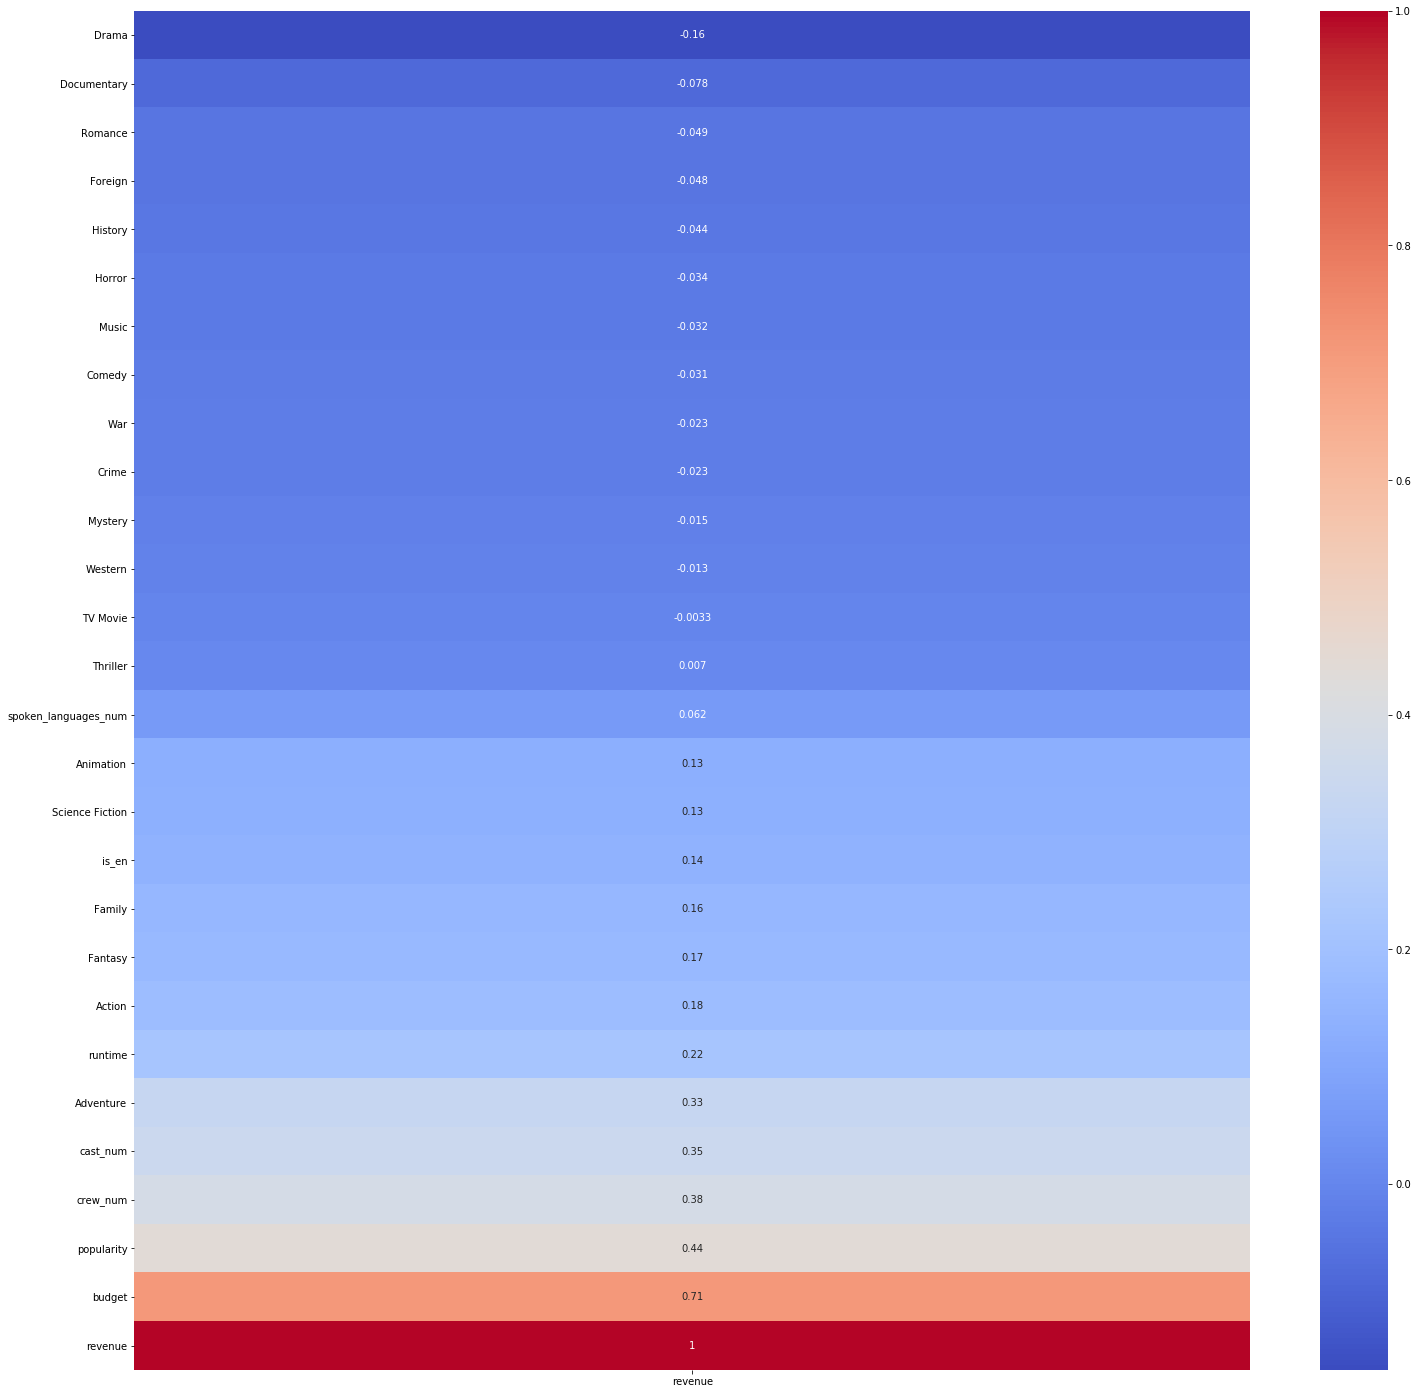

In [43]:
plt.figure(figsize=(25,25))
sns.heatmap(xy.corr()[['revenue']].sort_values('revenue'),cmap = 'coolwarm', annot=True);

In [44]:
lr = LinearRegression()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 241)
lr.fit(X_train, y_train)
lr.score(X_test,y_test)

0.6946230381066479

In [45]:
y_output = list(lr.predict(X_test))

In [46]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 42)

In [47]:
lr = LinearRegression()
scores = []
maximum_found = 0
maximum_index = 0
for x in range(500):
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = x)
    lr.fit(X_train, y_train)
    scores.append(lr.score(X_test, y_test))
    if lr.score(X_test, y_test)>maximum_found:
        maximum_found=lr.score(X_test, y_test)
        maximum_index = x

print(maximum_found)
print(maximum_index)

0.6946230381066479
241


In [48]:
poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)
l1 = Lasso(alpha = 100)
cross_val_score(l1, X_train, y_train).mean()

C:\Users\inser\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.0030342119859584e+18, tolerance: 3335076777216810.5
  positive)
C:\Users\inser\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.4742463230692244e+18, tolerance: 3426396300145872.0
  positive)
C:\Users\inser\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4.0435275056980966e+18, tolerance: 3554978925131082.5
  positive)
C:\Users\inser\anaconda3\envs\dsi\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:476: ConvergenceWarning: Objective did not converge. You migh

0.39866180617295044

In [49]:
pipes = Pipeline([('knn', KNeighborsRegressor())])
vote = VotingRegressor([('knn', pipes),\
         ('dt',DecisionTreeRegressor()),\
                     ('ada', AdaBoostRegressor()),
          ('rf', RandomForestRegressor()),
                    ('svr', SVR()),
                    ('bag', \
                     BaggingRegressor(DecisionTreeRegressor()))])
vote.fit(X_train, y_train)

VotingRegressor(estimators=[('knn',
                             Pipeline(memory=None,
                                      steps=[('knn',
                                              KNeighborsRegressor(algorithm='auto',
                                                                  leaf_size=30,
                                                                  metric='minkowski',
                                                                  metric_params=None,
                                                                  n_jobs=None,
                                                                  n_neighbors=5,
                                                                  p=2,
                                                                  weights='uniform'))],
                                      verbose=False)),
                            ('dt',
                             DecisionTreeRegressor(ccp_alpha=0.0,
                                                 

In [50]:
vote.score(X_train, y_train)

0.8463796753152493

In [51]:
vote.score(X_test,y_test)

0.6483591263715227